In [ ]:
#librerias
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

**Carga y preprocesamiento del dataset CIFAR-10**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


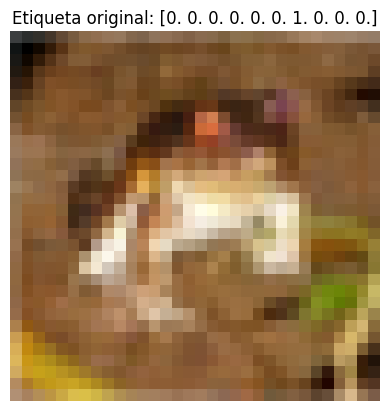

In [ ]:

# Cargar  conjunto de datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizar entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Codificar etiquetas en formato categórico
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# imagen de ejemplo
plt.imshow(X_train[0])
plt.title("Etiqueta original: {}".format(y_train[0]))
plt.axis('off')
plt.show()



En este paso se ha cargado el conjunto de datos CIFAR-10, que contiene 60.000 imágenes en color de tamaño 32x32 distribuidas en 10 clases.

- 50.000 imágenes para entrenamiento
- 10.000 imágenes para prueba

Se ha realizado la normalización de los píxeles y las etiquetas a formato categórico.

Se ha visualizado una imagen de ejemplo del conjunto de entrenamiento. Su etiqueta indica que pertenece a la clase "frog".

**Arquitectura del modelo convolucional**

In [ ]:

# Definir modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de flatten
model.add(Flatten())

# Capa fully conected
model.add(Dense(64, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Mostrar resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

**Compilación del Modelo**

In [ ]:
# Compilar el modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


En este paso se ha compilado el modelo CNN utilizando los siguientes parámetros:

- Función de pérdida: categorical_crossentropy, al tener clasificación multiclase con etiquetas codificadas en formato one-hot.
- Optimizador: adam, que ajusta automáticamente la velocidad de aprendizaje durante el entrenamiento.
- Métrica de evaluación: accuracy, que indica el porcentaje de predicciones correctas durante el entrenamiento y la validación.




**Entrenamiento del Modelo**

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.3532 - loss: 1.7689 - val_accuracy: 0.5274 - val_loss: 1.3159
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.5678 - loss: 1.2393 - val_accuracy: 0.6146 - val_loss: 1.1116
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6279 - loss: 1.0754 - val_accuracy: 0.6550 - val_loss: 1.0076
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6591 - loss: 0.9678 - val_accuracy: 0.6724 - val_loss: 0.9531
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6909 - loss: 0.8959 - val_accuracy: 0.6634 - val_loss: 0.9755
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7098 - loss: 0.8435 - val_accuracy: 0.6766 - val_loss: 0.9644
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.7308 - loss: 0.7795 - val_accuracy: 0.6836 - val_loss: 0.9257
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.7464 - loss: 0.7341 - 

Tras ver los reultados, decido hacer otro modelo, mas complejo pero que debería dar mejores resultados. Continúo con el mismo esquema y estructura de cóódigo que el modelo antrerior.

In [ ]:
# segundo modelo
model2 = Sequential()

# mayor profundidad
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dropout(0.5))  # Dropout para evitar sobreajuste

# Capa densa intermedia
model2.add(Dense(128, activation='relu'))

# salida
model2.add(Dense(10, activation='softmax'))

model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 65s 89ms/step - accuracy: 0.2923 - loss: 1.8926 - val_accuracy: 0.4566 - val_loss: 1.5321
Epoch 2/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.4893 - loss: 1.4198 - val_accuracy: 0.5918 - val_loss: 1.1647
Epoch 3/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.5587 - loss: 1.2358 - val_accuracy: 0.6288 - val_loss: 1.0652
Epoch 4/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.5966 - loss: 1.1308 - val_accuracy: 0.6490 - val_loss: 0.9963
Epoch 5/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6184 - loss: 1.0689 - val_accuracy: 0.6808 - val_loss: 0.9231
Epoch 6/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6393 - loss: 1.0199 - val_accuracy: 0.6986 - val_loss: 0.8744
Epoch 7/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 88ms/step - accuracy: 0.6600 - loss: 0.9710 - val_accuracy: 0.7166 - val_loss: 0.8453
Epoch 8/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6724 - loss: 0.9306 - 

In [ ]:
# Evaluar modelo 1
test_loss1, test_acc1 = model.evaluate(X_test, y_test, verbose=0)
print(f"Modelo 1 - Precisión en test: {test_acc1:.4f}, Pérdida: {test_loss1:.4f}")

# Evaluar modelo 2
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Modelo 2 - Precisión en test: {test_acc2:.4f}, Pérdida: {test_loss2:.4f}")


Modelo 1 - Precisión en test: 0.6755, Pérdida: 1.2315
Modelo 2 - Precisión en test: 0.7580, Pérdida: 0.7207


Observamos que se han mejorado los resultados considerablemente y decido graficar y compararlos visualmente

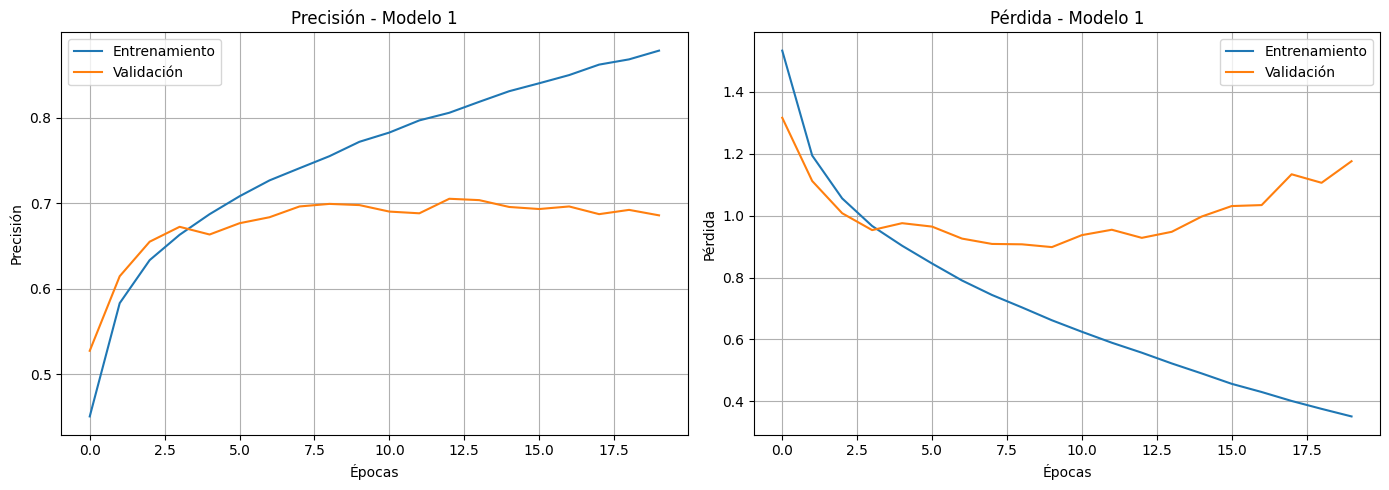

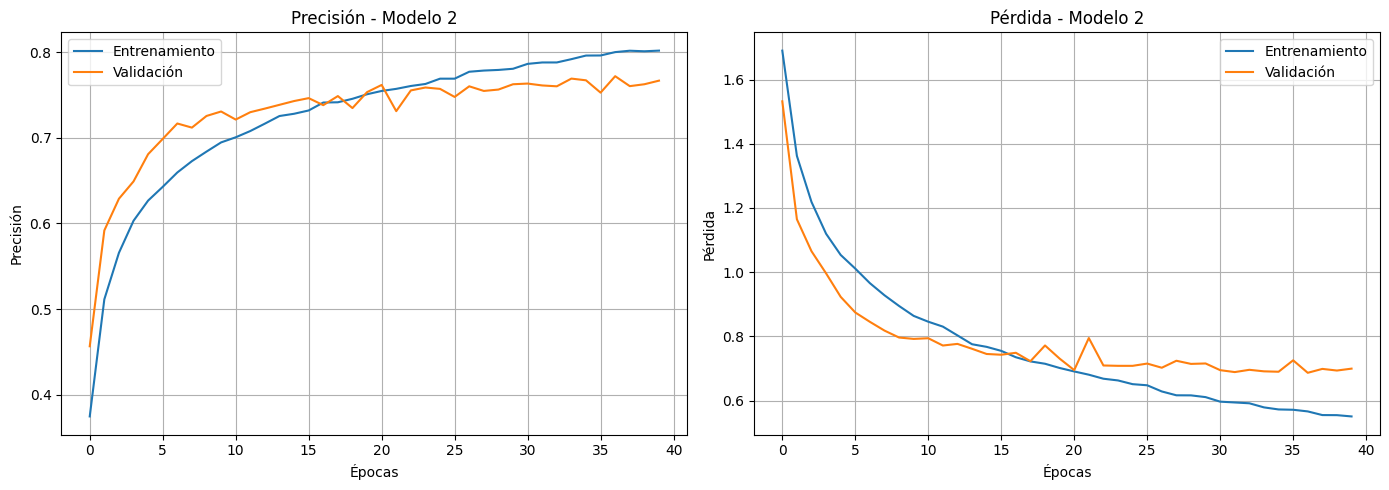

In [ ]:

# Función para graficar la  evolución del entrenamiento
def plot_history(history, label):
    plt.figure(figsize=(14, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Precisión - {label}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'Pérdida - {label}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

#  modelo 1
plot_history(history, "Modelo 1")
#  modelo 2
plot_history(history2, "Modelo 2")


Tras ver estos resultados observo que el segundo modelo mejora al primero. Por lo tanto, me animo a hacer un tercer mnodelo aún mas complejo y esperando todavía mejores resultados. Después deste modelo 3 haré una conclusión comparativa de estos tres modelos.

In [ ]:
# modelo 3
model3 = Sequential()

# Bloque 1
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Bloque 2
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Bloque 3
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten y capas densas
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10, activation='softmax'))

model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history3 = model3.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 153s 211ms/step - accuracy: 0.3712 - loss: 1.9038 - val_accuracy: 0.4738 - val_loss: 1.4626
Epoch 2/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 195s 202ms/step - accuracy: 0.5565 - loss: 1.2447 - val_accuracy: 0.6358 - val_loss: 1.0155
Epoch 3/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 202s 203ms/step - accuracy: 0.6221 - loss: 1.0548 - val_accuracy: 0.6344 - val_loss: 1.0233
Epoch 4/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 201s 202ms/step - accuracy: 0.6649 - loss: 0.9499 - val_accuracy: 0.6992 - val_loss: 0.8788
Epoch 5/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 200s 199ms/step - accuracy: 0.6942 - loss: 0.8620 - val_accuracy: 0.6794 - val_loss: 0.9167
Epoch 6/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 198ms/step - accuracy: 0.7146 - loss: 0.8098 - val_accuracy: 0.6672 - val_loss: 0.9600
Epoch 7/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 143s 200ms/step - accuracy: 0.7339 - loss: 0.7555 - val_accuracy: 0.6528 - val_loss: 0.9965
Epoch 8/40
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 199ms/step - accuracy: 0.7450 -

In [ ]:
# Evaluar
test_loss3, test_acc3 = model3.evaluate(X_test, y_test, verbose=0)
print(f"Modelo 3 - Precisión en test: {test_acc3:.4f}, Pérdida: {test_loss3:.4f}")


Modelo 3 - Precisión en test: 0.8028, Pérdida: 0.6136


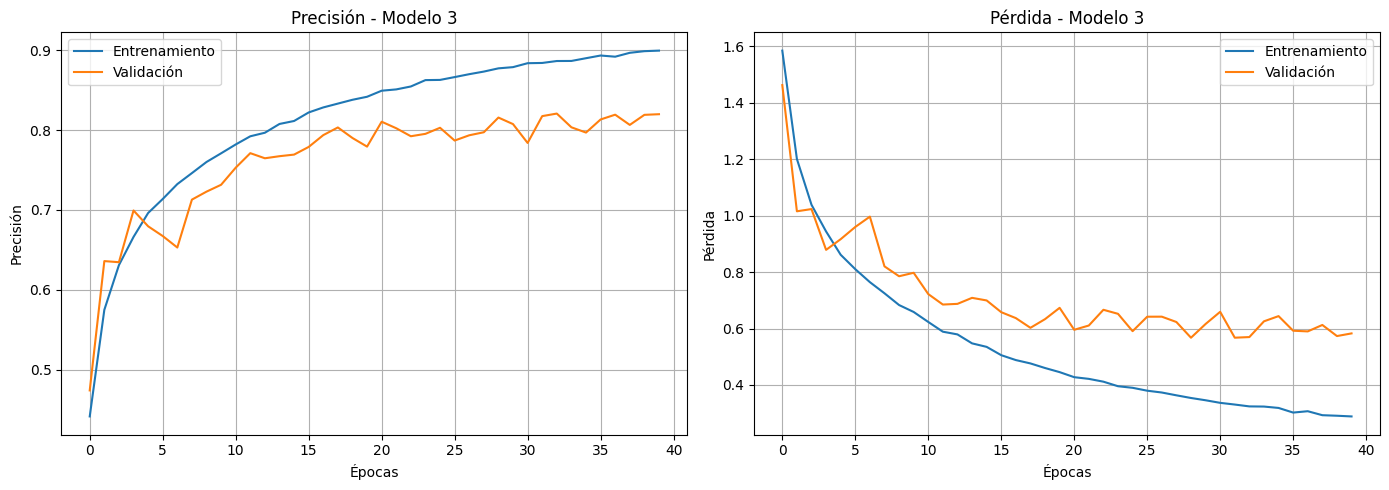

In [ ]:
# Graficammosigual que en los modelos anteriores

def plot_history_model3(history):
    plt.figure(figsize=(14, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Precisión - Modelo 3')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Pérdida - Modelo 3')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history_model3(history3)


 **Conclusión y Comparación de los Tres Modelos CNN**

Modelo 1:
- Capas: 2 `Conv2D`, 2 `MaxPooling`, `Flatten`, `Dense(64)`, `Dense(10)`
- Rendimiento:
  - `Accuracy entrenamiento`: ~88.6%
  - `Accuracy validación`: ~70.2%
  - `Accuracy test`: ~70.4%
  - `Val_loss`: ~0.93
- Gráfica: Muestra overfitting a partir de la época 12, con descenso del `val_accuracy` y aumento de `val_loss`.
- Tiempo de entrenamiento: 23 minutos
- Conclusión: Buen punto de partida, pero no suficiente. El modelo memoriza los datos y no rinde bien en validación.

---

Modelo 2:
- Cambios aplicados:
  - Añadida una tercera `Conv2D`
  - Añadido `Dropout(0.5)`
  - `Dense(128)` en lugar de 64
  - Aumento de épocas de 20 a 40
- Rendimiento:
  - `Accuracy entrenamiento`: ~80.7%
  - `Accuracy validación`: ~76.6%
  - `Accuracy test`: ~76.2%
  - `Val_loss`: ~0.69
- Gráfica: Mucha menos separación entre entrenamiento y validación, lo cual indica mejor generalización que el modelo anterior.
- Tiempo de entrenamiento: 48 minutos
- Conclusión: Mejor rendimiento general y reducción del overfitting gracias al `Dropout`. Validación mucho más consistente.

---

Modelo 3:
- Cambios respecto al modelo 2*:
  - Añadido `BatchNormalization` tras cada `Conv2D`
  - Tres bloques convolucionales con padding `"same"`
  - `Dropout` también tras `Dense(256)`
- Rendimiento:
  - `Accuracy entrenamiento`: ~90.7%
  - `Accuracy validación`: ~81.5%
  - `Accuracy test`: ~80.3%
  - `Val_loss`: ~0.57
- Gráfica: Progresiva y sin overfitting visible. Validación mejora hasta el final.
- Tiempo de entrenamiento: Cerca de 2 horas
- Conclusión: La arquitectura profunda con regularización y normalización ha logrado el mejor equilibrio entre precisión y pérdida de los tres modelos.

---

**Tabla de Resultados**

| Comparativa          | Modelo 1    | Modelo 2    | Modelo 3         |
|----------------------|-------------|-------------|-----------------|
| Overfitting          | Alto        | Bajo        | Muy bajo         |
| Val Accuracy         | ~70.2%      | ~76.6%      | ~81.5%           |
| Val Loss             | ~0.93       | ~0.69       | ~0.57            |
| Generalización       | Pobre       | Buena       | Excelente        |
| Tiempo entrenamiento | 23 min      | 48 min      | ~2 h             |


**Conclusión final**

El **Modelo 3 es el mejor de los tres**, no solo por su mayor precisión, sino porque:
- Presenta la mejor relación entre rendimiento y generalización
- Su arquitectura más completa y profunda
- El entrenamiento no tiene señales de overfitting
- La diferencia entre entrenamiento y validación es mínima

¿Merece la pena el mayor tiempo de entrenamiento del modelo 3?

Sí, claramente merece la pena. Aunque el tiempo se ha multiplicado por ~5 respecto al Modelo 1, mejora en:
- Precisión (+10 puntos porcentuales sobre modelo 1, +5 sobre modelo 2)
- Estabilidad de entrenamiento
- Comportamiento en validación y test

Este modelo refleja una mejora técnica clara respecto a los anteriores. Los resultados obtenidos son sólidos y apropiados para los objetivos del ejercicio y el aumento en la carga computacional es razonable y justificado.
